# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [6]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((3,3))
b = np.random.sample((3,3))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(a.ndim, b.ndim)
print(a.shape, b.shape)
# ========
print(a)
print(b)

2 2
(3, 3) (3, 3)
[[ 0.34029887  0.22433345  0.55838454]
 [ 0.92718973  0.8595971   0.53542085]
 [ 0.14557211  0.10351524  0.41597893]]
[[ 0.53585927  0.22492496  0.4249843 ]
 [ 0.00887878  0.2415166   0.75361855]
 [ 0.86215543  0.35784957  0.14420954]]


In [7]:
def mult(a, b):
    out = []
    for i in range(len(a)):
        out.append([a[i][j] * b[i][j] for j in range(len(a))])
    print(out)

In [8]:
def np_mult(a, b):
    print(a*b)

In [9]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

[[0.1823523043792806, 0.050458191880737205, 0.23730466304856507], [0.0082323156352691485, 0.20760696881551241, 0.40350308316419198], [0.12550578640674437, 0.037042882870687729, 0.059988130571538185]]
Wall time: 500 µs


In [10]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[ 0.1823523   0.05045819  0.23730466]
 [ 0.00823232  0.20760697  0.40350308]
 [ 0.12550579  0.03704288  0.05998813]]
Wall time: 1 ms


### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [29]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    S = np.array([np.average(A[:i+1]) for i in range(len(A))])
    return S

In [31]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        S[i] = sum([A[j] for j in range(i+1)])/(i+1)
    return np.array(S)

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее


A = sps.uniform.rvs(size=10**4) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
S1, S2, A
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 218 ms
Wall time: 13 s


1.2018552819625938e-11

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [10]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = X.copy()
    Y[1::2] = a
    Y[::2] = Y[::2]**3
    return Y

In [21]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    Y = X.copy()
    for i in range(1, len(Y), 2):
        Y[i] = a
        Y[i-1] = Y[i-1]**3
    if len(Y) % 2:
        Y[-1] = Y[-1]**3
    return Y

In [27]:
# X = np.array([2, 3, 4, 5, 6, 7, 8])
X = sps.uniform.rvs(size=10**7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 345 ms
Wall time: 4.06 s


0.0

Почему методы ***numpy*** оказываются эффективнее?

*** Потому что numpy работает на сишных массивах ***

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [38]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

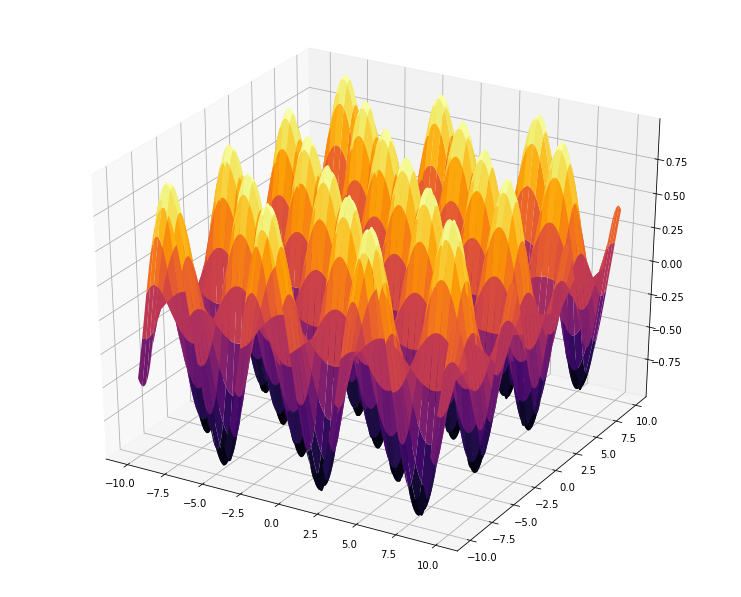

In [45]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline

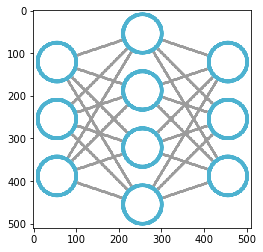

In [48]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [59]:
flat_image_array = image_array.ravel()

In [60]:
len(flat_image_array)

1040400